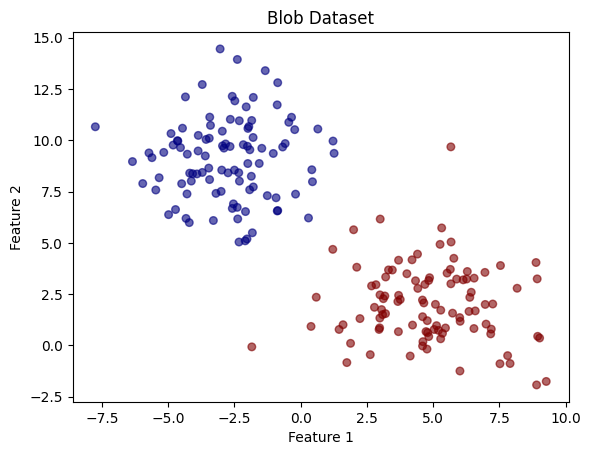

Basic Perceptron Accuracy: 100.00%
Modified Perceptron Accuracy: 100.00%
Widrow-Hoff Accuracy: 100.00%


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generating dataset
def generate_blob_data():
    X, y = make_blobs(n_samples=200, centers=2, cluster_std=2, random_state=42)
    return X, y

X, y = generate_blob_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="jet", s=30, alpha=0.6)
plt.title("Blob Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#Basic Perceptron
class Perceptron:
    def __init__(self, n, theta=3):
        self.w = np.random.uniform(-0.01, 0.01, n+1)
        self.w[0] = -theta
        self.x_0 = 1

    def _predict(self, X):
        summation = np.dot(self.w[1:], X) + self.w[0] * self.x_0
        return 1 if summation >= 0 else 0

    def train(self, Features, labels, epoch=100):
        for _ in range(epoch):
            for X, y in zip(Features, labels):
                pred_y = self._predict(X)
                if y != pred_y:
                    if y == 1:
                        self.w[1:] += X
                        self.w[0] += 1 * self.x_0
                    else:
                        self.w[1:] -= X
                        self.w[0] -= 1 * self.x_0

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

#Modified Perceptron with Gain
class ModifiedPerceptron:
    def __init__(self, n, theta=3, gain=0.1):
        self.w = np.random.uniform(-0.01, 0.01, n+1)
        self.w[0] = -theta
        self.x_0 = 1
        self.gain = gain

    def _predict(self, X):
        summation = np.dot(self.w[1:], X) + self.w[0] * self.x_0
        return 1 if summation >= 0 else 0

    def train(self, Features, labels, epoch=100):
        for _ in range(epoch):
            for X, y in zip(Features, labels):
                pred_y = self._predict(X)
                if y != pred_y:
                    if y == 1:
                        self.w[1:] += self.gain * X
                        self.w[0] += self.gain * self.x_0
                    else:
                        self.w[1:] -= self.gain * X
                        self.w[0] -= self.gain * self.x_0

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

#Widrow-Hoff Delta Rule
class WidrowHoff:
    def __init__(self, n, theta=3, gain=0.1):
        self.w = np.random.uniform(-0.01, 0.01, n+1)
        self.w[0] = -theta
        self.x_0 = 1
        self.gain = gain

    def _predict(self, X):
        summation = np.dot(self.w[1:], X) + self.w[0] * self.x_0
        return 1 if summation >= 0 else 0

    def train(self, Features, labels, epoch=100):
        for _ in range(epoch):
            for X, y in zip(Features, labels):
                pred_y = self._predict(X)
                delta = y - pred_y
                self.w[1:] += delta * self.gain * X
                self.w[0] += delta * self.gain * self.x_0

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

#Train and Evaluate All Models
models = {
    "Basic Perceptron": Perceptron(n=2),
    "Modified Perceptron": ModifiedPerceptron(n=2),
    "Widrow-Hoff": WidrowHoff(n=2)
}

for name, model in models.items():
    model.train(X_train, y_train, epoch=100)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")


Accuracy on AND problem: 100.00%


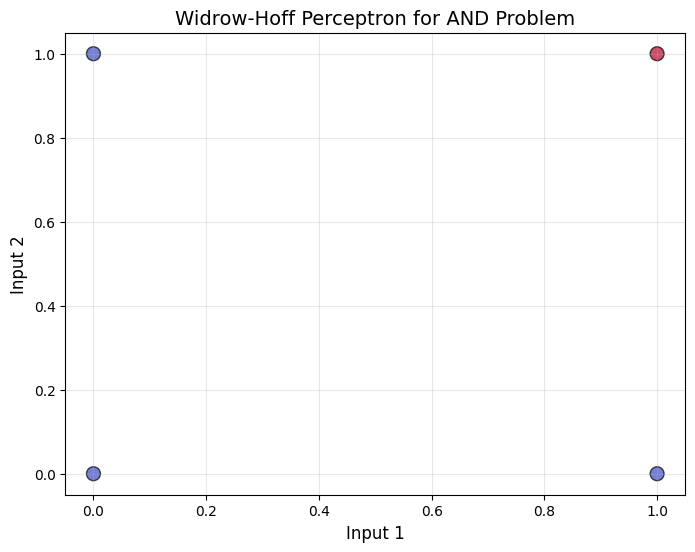

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#Widrow-Hoff Perceptron class
class WidrowHoff:
    """
    Widrow-Hoff delta rule perceptron for binary classification
    """
    def __init__(self, n, theta=5, gain=0.8):
        self.w = np.random.uniform(-0.01, 0.01, n + 1)  # Initialize weights
        self.w[0] = -theta  # Set the bias term
        self.x_0 = 1  # Bias input
        self.gain = gain  # Learning rate (gain)

    def _predict(self, X):
        summation = np.dot(self.w[1:], X) + self.w[0] * self.x_0
        return 1 if summation >= 0 else 0

    def train(self, Features, labels, epoch=100):
        for _ in range(epoch):
            for X, y in zip(Features, labels):
                pred_y = self._predict(X)
                delta = y - pred_y
                self.w[1:] += delta * self.gain * X
                self.w[0] += delta * self.gain * self.x_0

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

#AND dataset
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # Labels for AND operation

# Initialize & train Widrow-Hoff perceptron
model = WidrowHoff(n=2)
model.train(X_and, y_and, epoch=100)

# Prediction
y_pred = model.predict(X_and)

#Accuracy
accuracy = accuracy_score(y_and, y_pred)
print(f"Accuracy on AND problem: {accuracy * 100:.2f}%")


plt.figure(figsize=(8, 6))
plt.scatter(X_and[:, 0], X_and[:, 1], c=y_pred, cmap='coolwarm', s=100, edgecolor='k', alpha=0.7)
plt.title("Widrow-Hoff Perceptron for AND Problem", fontsize=14)
plt.xlabel("Input 1", fontsize=12)
plt.ylabel("Input 2", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()
